In [150]:
import numpy as np

In [151]:
import pandas as pd

In [152]:
import matplotlib.pyplot as plt
path = 'ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [153]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


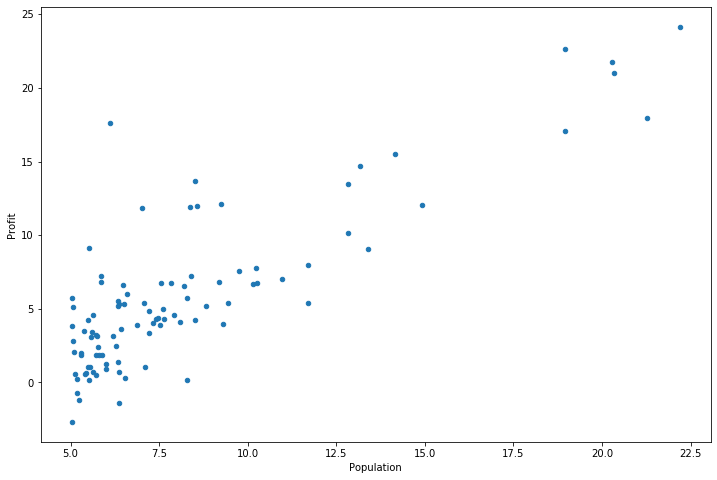

In [154]:
data.plot(kind='scatter', x='Population', y='Profit',figsize=(12,8))
plt.show()

In [155]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [156]:
data.insert(0, 'Ones',1)

In [157]:
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [158]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [159]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))
#theta = np.array([0,0])

In [160]:
theta

matrix([[0, 0]])

In [161]:
computeCost(X, y, theta)

32.072733877455676

In [162]:
##batch gradient decent
theta.shape[1]

2

In [163]:
def gradientDescent(X, y, theta, alpha, iters):
    cost = np.zeros(iters)
    
    for iter in range(iters):
        term = np.multiply((X*theta.T-y),X)
        error = (alpha/len(X))*np.sum(term,axis=0)
        #error = np.matrix(alpha*(np.sum((X*theta.T-y)*X,axis=0)/len(X))
        theta = theta - error
        cost[iter] = computeCost(X, y, theta)
    
    return theta, cost

In [164]:
alpha = 0.01
iters = 1000

In [165]:
g, cost = gradientDescent(X, y, theta, alpha, iters)
print(g)
print(cost)

[[-3.24140214  1.1272942 ]]
[6.73719046 5.93159357 5.90115471 5.89522859 5.89009494 5.88500416
 5.87993248 5.87487909 5.86984391 5.86482687 5.85982789 5.85484692
 5.84988389 5.84493874 5.8400114  5.83510181 5.8302099  5.82533562
 5.82047889 5.81563965 5.81081784 5.8060134  5.80122627 5.79645638
 5.79170367 5.78696808 5.78224955 5.77754801 5.77286341 5.76819568
 5.76354477 5.75891061 5.75429313 5.7496923  5.74510803 5.74054027
 5.73598897 5.73145406 5.72693549 5.72243319 5.71794711 5.71347718
 5.70902336 5.70458558 5.70016379 5.69575792 5.69136792 5.68699373
 5.6826353  5.67829257 5.67396548 5.66965398 5.665358   5.6610775
 5.65681242 5.6525627  5.64832829 5.64410913 5.63990517 5.63571635
 5.63154261 5.62738391 5.6232402  5.6191114  5.61499748 5.61089837
 5.60681403 5.60274441 5.59868944 5.59464907 5.59062326 5.58661195
 5.58261509 5.57863263 5.57466451 5.57071068 5.56677109 5.5628457
 5.55893444 5.55503727 5.55115414 5.547285   5.54342979 5.53958847
 5.53576098 5.53194728 5.52814732 5.

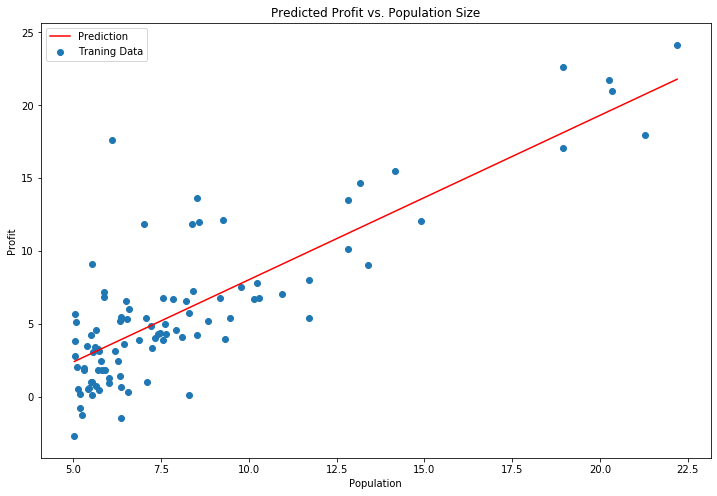

In [166]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

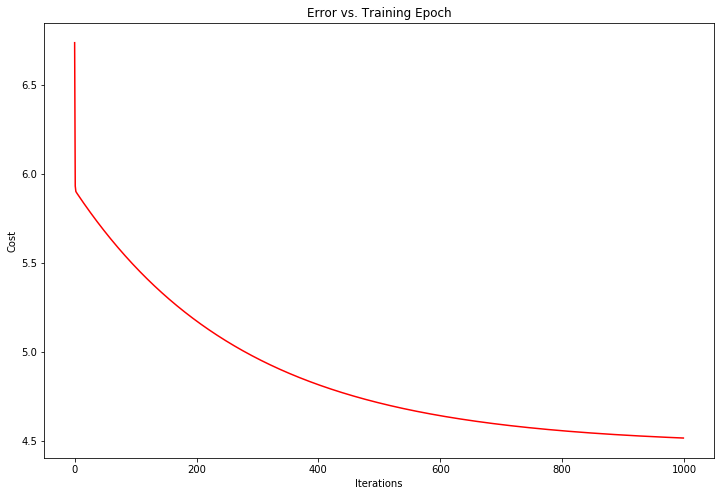

In [167]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()